### Estimation of $pi$ by Monte Carlo Simulation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from collections import Counter
from time import time
%matplotlib inline

In [2]:
def pi_hat(N = int(1e4)):
    x = 2 * np.random.uniform(0.,1.,size = N) - 1
    y = 2 * np.random.uniform(0.,1.,size = N) - 1
    z = x ** 2 + y ** 2
    pi_est = 4 * np.mean(z <= 1)
    return (pi_est)
pi_hat()

3.1408

In [3]:
mu = 0.0005
vol = 0.001
T = 252
sim_returns = []
for i in range(100):
    rand_rets = np.random.normal(mu,vol,T)
    sim_returns.append(rand_rets)
var_95 = np.percentile(sim_returns, 5)
var_95

r_d = 0.12; r_e = 0.14
w_d = 0.2; w_e = 0.8; T = 0.35
wacc = w_d * r_d * (1 - T) + w_e * r_e
np.round(wacc * 100, 2)

12.76

### 주사위를 던져서 max(X-4, 0) * pt를 얻는다. 
1pt = 50만원. r = 2%.T =1

(0.5, 6.5)

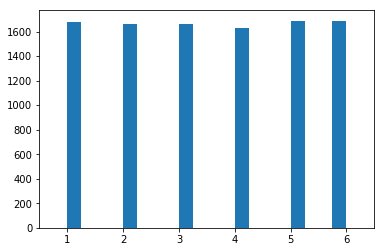

In [4]:
plt.hist(np.random.choice(range(1,7), 10000, p = [1/6] * 6), bins = 20)
plt.xlim(0.5, 6.5)

In [5]:
def MC_price(N = int(1e4)):
    K = 4; pt = 5e5; r = 0.02; T = 1
    
    # MC_Price
    X1 = np.random.choice(range(1, 7), N, [1/6] * 6)
    X = np.maximum(X1 - K, 0)
    Money = X * np.exp(-r * T) * pt
    MC_price = round(np.mean(Money), 2)
    
    # Theoretical_Price
    Theo_Price = 0
    for i in range(1,7):
        Theo_Price += (1/6) * max(i - K, 0) * np.exp(-r * T) * pt
    Theo_Price = round(Theo_Price, 2)
    
    # Gap Between MC_price and Theoretical_Price
    gap = round(MC_price - Theo_Price, 2)
    
    return [MC_price, Theo_Price, gap]

In [6]:
MC_price()

[250195.71, 245049.67, 5146.04]

### Generation of Kospi200 by Geometric Brownian Motion

In [7]:
def Kospi200_GBM():
    r = 0.03; vol = 0.3; T = 1; N = 252; dt = T/N
    S = np.zeros(N+1); S[0] = 230 ## 230에서 시작.
    t = np.linspace(0, T, (N+1)); phi = np.random.randn(N)
    for i in range(N):
        S[i+1] = S[i] * np.exp((r - 0.5 * vol ** 2)*dt + vol * np.sqrt(dt) * phi[i])
    plt.plot(t,S)
    plt.plot(t,S, 'o')
    plt.xlabel("Time (Year)")
    plt.ylabel("Kospi200 Index")
    plt.title("Kospi200 Generated by\n Geometric Brownian Motion")
    plt.show()

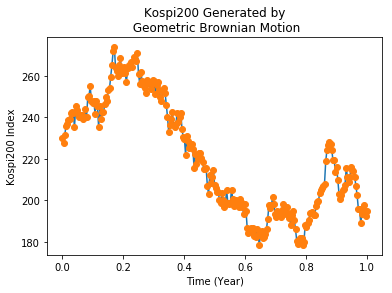

In [8]:
Kospi200_GBM()

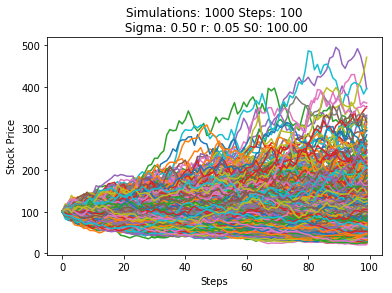

22.740328429470196


In [9]:
S0 = 100 #initial stock price
K = 100 #strike price
r = 0.05 #risk-free interest rate
sigma = 0.50 #volatility in market
T = 1 #time in years
N = 100 #number of steps within each simulation
deltat = T/N #time step
i = 1000 #number of simulations
discount_factor = np.exp(-r*T) #discount factor

S = np.zeros([i,N])
t = range(N)



for y in range(i):
    S[y,0]=S0
    for x in range(0,N-1):
        S[y,x+1] = S[y,x]*(np.exp((r-(sigma**2)/2)*deltat + sigma*np.sqrt(deltat)*np.random.normal(0,1)))
    plt.plot(t,S[y])

plt.title('Simulations: %d Steps: %d\n Sigma: %.2f r: %.2f S0: %.2f' % (i, N, sigma, r, S0))
plt.xlabel('Steps')
plt.ylabel('Stock Price')
plt.show()

C = np.zeros((i-1,1), dtype=np.float16)
for y in range(0,i-1):
    C[y]=np.maximum(S[y,N-1]-K,0)

CallPayoffAverage = np.average(C)
CallPayoff = discount_factor*CallPayoffAverage
print(CallPayoff)

### Simulation of 50 indices.

In [10]:
def fifty_index():
    S0 = 230.; r = 0.03; vol = 0.3; T = 1; N = 252 
    dt = T/N # time step
    sim_n = 50 # number of simulations
    S = np.zeros((N, sim_n)) 
    S[0,:] = S0
    t = np.linspace(0,T-dt,N) # 정확히 1년 후부터는 제외.

    for j in range(sim_n):
        for i in range(N-1):
            S[i+1,j] = S[i,j]*np.exp((r - vol**2/2)*dt + vol*np.sqrt(dt)*np.random.randn())
        plt.plot(t,S[:,j])

    plt.title('Simulations: %d Steps: %d\n Sigma: %.2f r: %.2f S0: %.2f' % (sim_n, N, vol, r, S0))
    plt.xlabel('Time(year)')
    plt.ylabel('Index')
    plt.show()

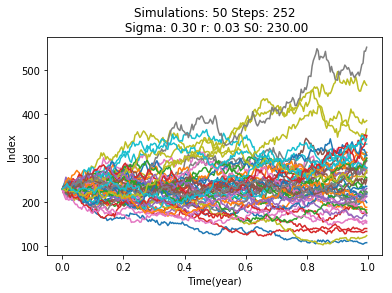

In [11]:
fifty_index()

### MC Call

In [12]:
def MC_Call(S0 = 230, E = 230, r = 0.0265, T = 1, vol = 0.46):
    N = 10; dt = T/N; M = 1000 # 1000 MC simulations
    S = np.zeros((M, N + 1))
    S[:,0] = S0
    t = np.linspace(0, T, N + 1)
    for i in range(M):
        for j in range(N):
            S[i, j+1] = S[i, j] * np.exp((r-vol**2/2)*dt + vol*np.sqrt(dt)*np.random.randn())
    S_T = S[:,-1]
    payoff = np.maximum(S_T - E, 0)
    MC_Call = round((np.exp(-r*T)*payoff).mean(),2)
    return MC_Call

In [13]:
MC_Call()

47.58

In [14]:
E = 230; L = 800; vol = 0.46; r = 0.0265; T = 1
Nt = 252; dt = T/Nt
Nx = 51; x = np.linspace(0, L, Nx)

c:\users\jaehwan m\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


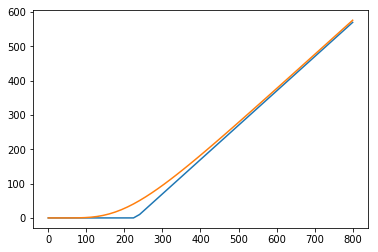

In [15]:
v = (x-E)*((x-E)>0);v
d1 = (np.log(x/E) + (r+vol**2/2)*T)/(vol*np.sqrt(T))
d2 = d1 - vol*np.sqrt(T)
BS_price = x * norm.cdf(d1) - E * np.exp(-r*T) * norm.cdf(d2)
plt.plot(x, v)
plt.plot(x, BS_price)
plt.show()

### 2 assets MC Call

In [16]:
def twod_Call(S = [100, 100], E = [100, 100], vol = [0.3, 0.3], r = 0.05, T = 0.5, rho = 0.5):
    ns = 1000; N=252; dt = T/N
    SP1 = np.zeros((ns,N+1)); SP2 = np.zeros((ns,N+1))
    SP1[:,0] = S[0]; SP2[:,0] = S[1]
    L = np.array([[1, 0], [rho, np.sqrt(1-rho**2)]])
    t1 = time()
    for i in range(ns):
        for j in range(N):
            phi = np.random.randn(2)
            phi_ = np.dot(L, phi)
            SP1[i,j+1] = SP1[i,j] * np.exp((r - vol[0]**2/2)*dt + vol[0]*np.sqrt(dt)*phi_[0])
            SP2[i,j+1] = SP2[i,j] * np.exp((r - vol[1]**2/2)*dt + vol[1]*np.sqrt(dt)*phi_[1])
    payoff1 = np.maximum(SP1[:,-1] - E[0], 0)
    payoff2 = np.maximum(SP2[:,-1] - E[1], 0)
    payoff = np.maximum(payoff1, payoff2)
    t2 = time()
    elapsed = t2-t1
    print("Took %.4f seconds."% elapsed)
    # Call = round(((payoff*np.exp(-r*T)).sum())/ns,4)
    Call = round(payoff.mean() * np.exp(-r*T),4)
    return Call

In [17]:
twod_Call()

Took 9.1967 seconds.


14.0102

### Cash or Nothing (Call option)

In [18]:
def MC_CorN(S0 = 101, E = 100, r = 0.05, T = 0.5, vol = 0.3):
    M = 10**3
    N=252; dt = T/N
    Cash = 100
    S = np.zeros((M, N+1)); S[:,0] = S0
    t1 = time()
    for i in range(M):
        for j in range(N):
            S[i,j+1] = S[i,j] * np.exp((r-vol**2/2)*dt + vol*np.sqrt(dt)*np.random.randn())
    payoff = Cash * ((S[:,-1]-E) >= 0)
    Call = payoff.mean() * np.exp(-r*T)
    Call = round(Call, 4)
    t2 = time()
    elapsed = t2-t1
    print("Took %.2f seconds"%elapsed)
    
    d1 = (np.log(S0/E) + (r + vol**2/2)*T)/(vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    BS_price = Cash * np.exp(-r*T) * norm.cdf(d2) ## Exotic Option!
    BS_price = round(BS_price, 4)
    
    gap = abs(Call - BS_price)
    gap = round(gap, 4)
    
    return [Call, BS_price, gap]

In [19]:
MC_CorN() 
### M을 늘려야 정확도를 높인다. 하지만 계산시간 오래걸림.

Took 2.50 seconds


[50.4235, 51.0478, 0.6243]

### Asset or Nothing (Call option) : Assume no dividend

In [20]:
def MC_AorN(S0 = 101, E = 100, r = 0.05, T = 0.5, vol = 0.3):
    M = 10**4
    N=252; dt = T/N
    S = np.zeros((M, N+1)); S[:,0] = S0
    t1 = time()
    for i in range(M):
        for j in range(N):
            S[i,j+1] = S[i,j] * np.exp((r-vol**2/2)*dt + vol*np.sqrt(dt)*np.random.randn())
    payoff = S[:,-1] * ((S[:,-1]-E) >= 0)
    Call = payoff.mean() * np.exp(-r*T)
    Call = round(Call, 4)
    t2 = time()
    elapsed = t2 - t1
    print("Took %.2f seconds."%elapsed)
    
    d1 = (np.log(S0/E) + (r + vol**2/2)*T)/(vol*np.sqrt(T))
    d2 = d1 - vol*np.sqrt(T)
    BS_price = S0 * norm.cdf(d1) ## Exotic Option!
    BS_price = round(BS_price, 4)
    
    gap = abs(Call - BS_price)
    gap = round(gap, 4)
    
    return [Call, BS_price, gap]

In [21]:
MC_AorN()

Took 25.46 seconds.


[62.1495, 61.2804, 0.8691]

In [22]:
r = 0.03; sigma = 0.3; ns =10**4
T = 1; N = 365; dt = T/N
coupon_rate = np.linspace(0.055,0.22,4)
strike_price = np.arange(90,70,-5)
S = np.zeros(N+1); S[0] = 100
check_day = (np.ceil(N*np.linspace(T/4,T,4))).astype(int)
tot_payoff = np.zeros(4); payoff = np.zeros(4); payment = np.zeros(4)
payment = 100 * (1 + coupon_rate)
t1 = time()
for i in range(ns):
    for j in range(N):
        S[j+1] = S[j] * np.exp((r-sigma**2/2)*dt + sigma*np.sqrt(dt)*np.random.randn())
    Index = S[check_day]
    payoff[:] = 0; yn = 0
    for j in range(4):
        if Index[j] >= strike_price[j]:
            payoff[j] = payment[j]; yn=1
            break
    if yn == 0:
        payoff[-1] = S[-1]
    tot_payoff += payoff
tot_payoff /= ns
disc_payoff = tot_payoff * np.exp(-r*check_day/N)
price = sum(disc_payoff)
t2 = time()
elapsed = round(t2 - t1, 2)    

In [23]:
print([price, elapsed])

[102.65892929269867, 36.43]
